In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("Dataset\Electric_Vehicle_Population_Data.csv")


<>:1: SyntaxWarning: invalid escape sequence '\E'
<>:1: SyntaxWarning: invalid escape sequence '\E'
C:\Users\gabri\AppData\Local\Temp\ipykernel_11608\4185104797.py:1: SyntaxWarning: invalid escape sequence '\E'
  df = pd.read_csv("Dataset\Electric_Vehicle_Population_Data.csv")


In [3]:
df.head()
df.info()
df.describe(include='all') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246137 entries, 0 to 246136
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         246137 non-null  object 
 1   County                                             246133 non-null  object 
 2   City                                               246133 non-null  object 
 3   State                                              246137 non-null  object 
 4   Postal Code                                        246133 non-null  float64
 5   Model Year                                         246137 non-null  int64  
 6   Make                                               246137 non-null  object 
 7   Model                                              246137 non-null  object 
 8   Electric Vehicle Type                              246137 non-null  object

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
count,246137,246133,246133,246137,246133.000000,246137.000000,246137,246137,246137,246137,246120.000000,246120.000000,245597.000000,2.461370e+05,246126,246133,2.461330e+05
unique,14503,217,803,48,NaN,NaN,46,174,2,3,NaN,NaN,NaN,NaN,992,76,NaN
top,7SAYGDEE6P,King,Seattle,WA,NaN,NaN,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,NaN,NaN,NaN,NaN,POINT (-122.13158 47.67858),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),NaN
freq,1203,123557,38996,245597,NaN,NaN,104100,51050,195031,147516,NaN,NaN,NaN,NaN,6048,88789,NaN
mean,NaN,NaN,NaN,NaN,98179.658481,2021.535698,NaN,NaN,NaN,NaN,44.872192,746.606188,28.871831,2.374324e+08,NaN,NaN,5.297685e+10
std,NaN,NaN,NaN,NaN,2494.101983,2.999144,NaN,NaN,NaN,NaN,82.913952,6987.233456,14.895938,6.719158e+07,NaN,NaN,1.580103e+09
min,NaN,NaN,NaN,NaN,1731.000000,2000.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,4.385000e+03,NaN,NaN,1.001020e+09
25%,NaN,NaN,NaN,NaN,98052.000000,2020.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,17.000000,2.083391e+08,NaN,NaN,5.303301e+10
50%,NaN,NaN,NaN,NaN,98126.000000,2023.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,32.000000,2.548460e+08,NaN,NaN,5.303303e+10
75%,NaN,NaN,NaN,NaN,98375.000000,2024.000000,NaN,NaN,NaN,NaN,37.000000,0.000000,42.000000,2.717319e+08,NaN,NaN,5.305307e+10


In [4]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 4
City                                                   4
State                                                  0
Postal Code                                            4
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                        17
Base MSRP                                             17
Legislative District                                 540
DOL Vehicle ID                                         0
Vehicle Location                                      11
Electric Utility                                       4
2020 Census Tract                                      4
dtype: int64

In [6]:
df.groupby('Electric Vehicle Type')['Base MSRP'].mean().sort_values(ascending=False)


Electric Vehicle Type
Plug-in Hybrid Electric Vehicle (PHEV)    1245.148956
Battery Electric Vehicle (BEV)             616.011301
Name: Base MSRP, dtype: float64

In [8]:
# Criar duas novas colunas apenas quando o valor tem vírgula e parênteses
def extrair_lat_lon(location):
    try:
        if isinstance(location, str) and ',' in location and '(' in location:
            lat, lon = location.strip("()").split(", ")
            return float(lat), float(lon)
    except:
        return None, None
    return None, None

# Aplicar a função para extrair latitude e longitude
df[['Latitude', 'Longitude']] = df['Vehicle Location'].apply(lambda x: pd.Series(extrair_lat_lon(x)))

# Converter as colunas (caso não tenha sido feito ainda)
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')

# Filtrar apenas linhas com latitude e longitude válidas (sem NaN)
df_clean = df[(df['Latitude'].notnull()) & (df['Longitude'].notnull())]


In [9]:
print(df_clean[['Latitude', 'Longitude']].isnull().sum())
print(len(df_clean))

Latitude     0
Longitude    0
dtype: int64
0


In [10]:
print(df['Vehicle Location'].dropna().unique()[:10])

['POINT (-122.23825 47.49461)' 'POINT (-120.53145 46.65405)'
 'POINT (-120.1871 46.33949)' 'POINT (-122.1872 47.61001)'
 'POINT (-122.60735 46.94239)' 'POINT (-122.9131 47.01359)'
 'POINT (-122.34134 47.46593)' 'POINT (-122.09305 47.91265)'
 'POINT (-122.30253 47.72656)' 'POINT (-122.12096 47.55584)']


In [11]:
def extrair_lat_lon_wkt(point_str):
    try:
        if isinstance(point_str, str) and point_str.startswith("POINT"):
            coords = point_str.replace("POINT (", "").replace(")", "").split()
            lon, lat = map(float, coords)
            return lat, lon  # Folium usa (lat, lon)
    except:
        return None, None
    return None, None

In [12]:
df[['Latitude', 'Longitude']] = df['Vehicle Location'].apply(lambda x: pd.Series(extrair_lat_lon_wkt(x)))

# Remover linhas com valores ausentes
df_clean = df.dropna(subset=['Latitude', 'Longitude']).copy()

In [ ]:
# Mapa centralizado - PC KILLER
mapa = folium.Map(
    location=[df_clean['Latitude'].mean(), df_clean['Longitude'].mean()],
    zoom_start=7
)

# Adicionar marcadores
for _, row in df_clean.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Make']} {row['Model']} - {row['City']}, {row['State']}",
        icon=folium.Icon(color='blue', icon='car', prefix='fa')
    ).add_to(mapa)

mapa

C:\Users\gabri\AppData\Local\Temp\ipykernel_11608\1294421272.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_marcas.values, y=top_marcas.index, palette='viridis')


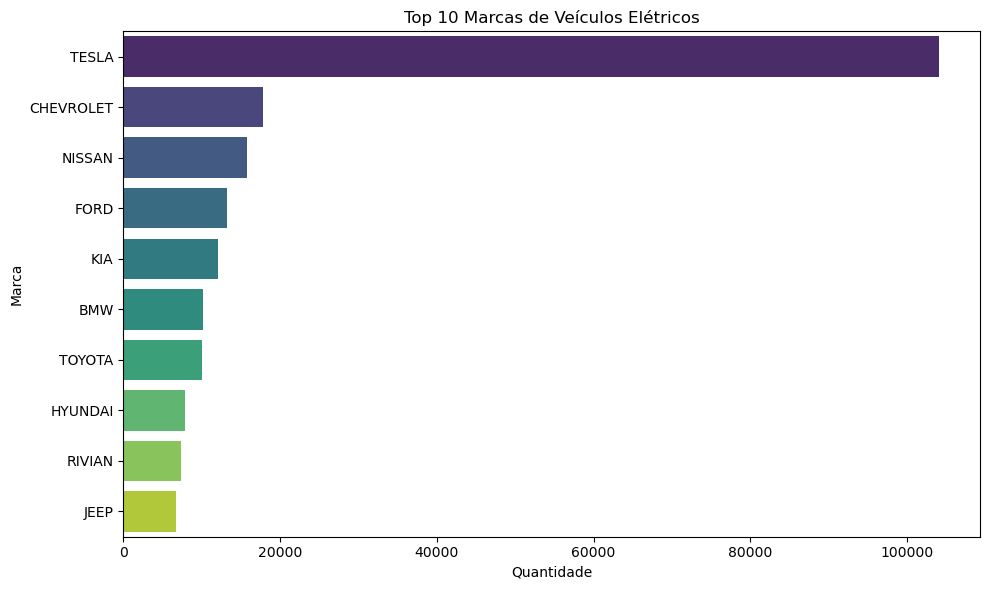

In [16]:
top_marcas = df['Make'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_marcas.values, y=top_marcas.index, palette='viridis')
plt.title('Top 10 Marcas de Veículos Elétricos')
plt.xlabel('Quantidade')
plt.ylabel('Marca')
plt.tight_layout()
plt.show()

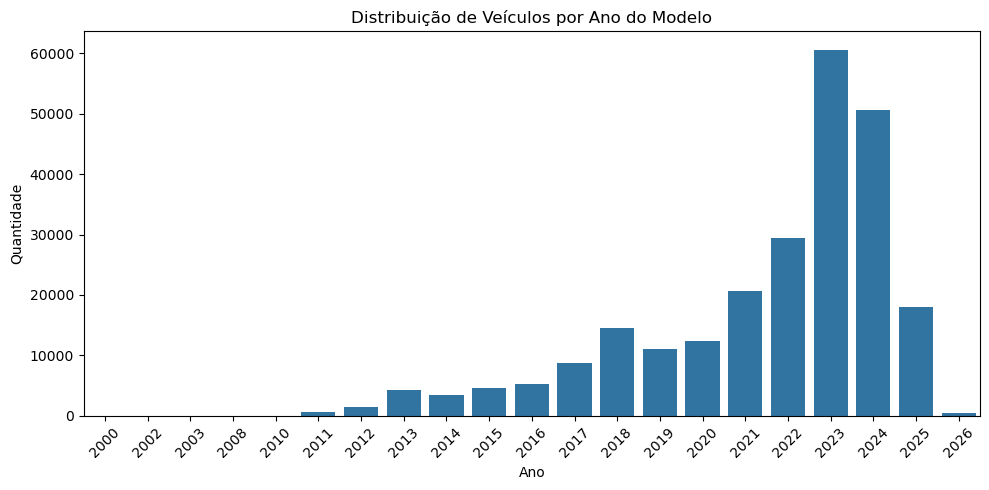

In [17]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Model Year', order=sorted(df['Model Year'].dropna().unique()))
plt.title('Distribuição de Veículos por Ano do Modelo')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


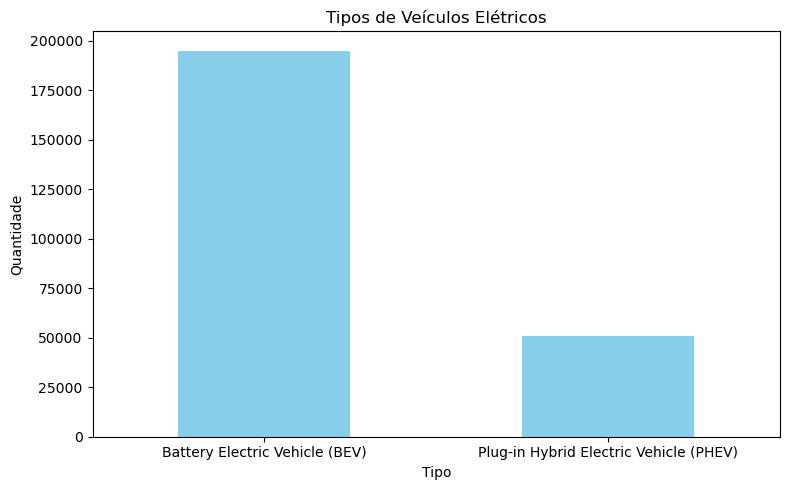

In [19]:
plt.figure(figsize=(8, 5))
df['Electric Vehicle Type'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Tipos de Veículos Elétricos')
plt.xlabel('Tipo')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


C:\Users\gabri\AppData\Local\Temp\ipykernel_11608\2261342482.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cidades.values, y=top_cidades.index, palette='magma')


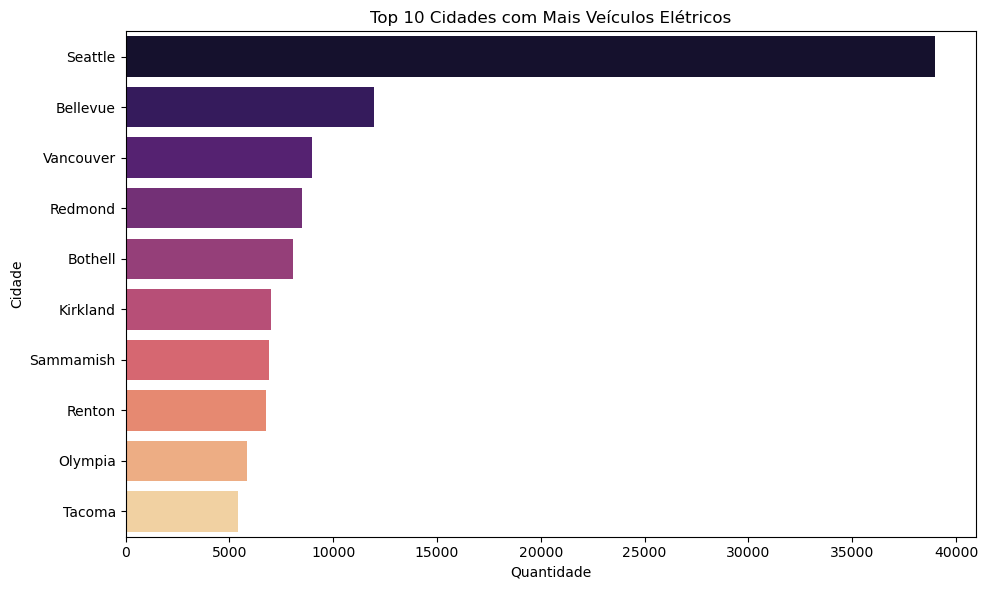

In [20]:
top_cidades = df['City'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_cidades.values, y=top_cidades.index, palette='magma')
plt.title('Top 10 Cidades com Mais Veículos Elétricos')
plt.xlabel('Quantidade')
plt.ylabel('Cidade')
plt.tight_layout()
plt.show()


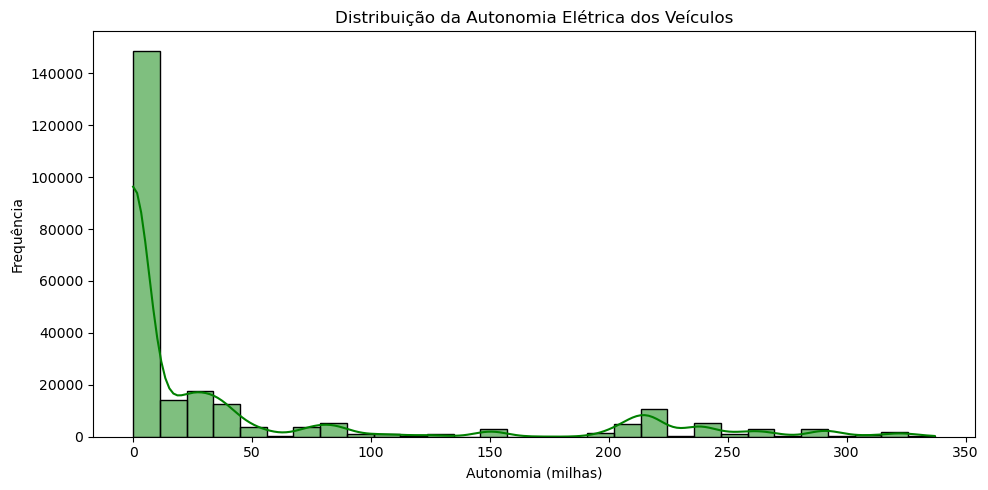

In [21]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Electric Range'].dropna(), bins=30, kde=True, color='green')
plt.title('Distribuição da Autonomia Elétrica dos Veículos')
plt.xlabel('Autonomia (milhas)')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()
